<a href="https://colab.research.google.com/github/dany-gaga/DGE_analysis/blob/main/csv_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run this code to mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import glob

In [ ]:
%cd /content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis

/content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis


In [ ]:
def mergings(path, pattern, file_symbol, file_stat):
    csvs = glob.glob(path + pattern)
    field_symbol = ['Gene ID', 'Gene Name or Symbol']
    field_stat = ['Gene', 'logFC', 'FDR','Description_Blast2GO']
    for csv in csvs:
        cs = pd.read_csv(csv)
        f_s = pd.read_csv(file_symbol, usecols=field_symbol)
        f_stat = pd.read_csv(file_stat, usecols=field_stat)

        gene_symbol = pd.merge(cs, f_s, left_on='gene', right_on='Gene ID', how='left')
        gene_symbol = pd.merge(gene_symbol, f_stat, left_on='gene', right_on='Gene', how='inner')
        gene_symbol.to_csv(csv + "_with_stat.csv", index = False)

In [ ]:
mergings('/content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis/', 'BD*.csv', './genes_and_symbol.csv', './stat1_BD_vs_KIS.csv')

In [ ]:
mergings('/content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis/', 'BP*.csv', './genes_and_symbol.csv', './stat1_BP_vs_KIS.csv')

In [ ]:
mergings('/content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis/', 'DD*.csv', './genes_and_symbol.csv', './stat1_DD_vs_KIS.csv')

In [ ]:
mergings('/content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis/', 'DP*.csv', './genes_and_symbol.csv', './stat1_DP_vs_KIS.csv')

In [ ]:
files = glob.glob("/content/gdrive/MyDrive/from_snpeff-vcf_to_downstream_analysis/*_with_stat.csv")

for fp in files:
    df = pd.read_csv(fp)
    df['Sample_ID'] = os.path.basename(fp).split('.')[0][:4]
    df.to_csv(fp, index=False)

In [ ]:
csv_list = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    csv_list.append(df)

df_out = pd.concat(csv_list, axis=0, ignore_index=True)

df_out.to_csv("all_csv.csv")

In [ ]:
all_csv = pd.read_csv('all_csv.csv')
all_csv.head(10)


,Unnamed: 0.1,Unnamed: 0,genome,POS,REF,ALT,effect,impact,gene,mut_cdna,...,mut_type,Gene ID,Gene Name or Symbol,Gene,logFC,FDR,Description_Blast2GO,Sample_ID,Locality,Insecticides
0,4,4,AgamP4_2L,204387,A,G,missense_variant,MODERATE,AGAP004678,466A>G,...,snp,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
1,5,5,AgamP4_2L,204516,ATC,GTT,missense_variant,MODERATE,AGAP004678,595_597delATCinsGTT,...,complex,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
2,6,6,AgamP4_2L,204529,C,A,missense_variant,MODERATE,AGAP004678,608C>A,...,snp,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
3,7,7,AgamP4_2L,204786,T,A,missense_variant,MODERATE,AGAP004678,865T>A,...,snp,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
4,12,12,AgamP4_2L,460919,C,A,missense_variant,MODERATE,AGAP004682,164G>T,...,snp,AGAP004682,NaN,AGAP004682,-0.504557,1.729548e-06,U4 U6 small nuclear ribonucleo Prp3,BD01,Bassila,Deltamethrin
5,15,15,AgamP4_2L,485766,T,C,missense_variant,MODERATE,AGAP004683,2179A>G,...,snp,AGAP004683,NaN,AGAP004683,-0.613243,4.309897e-08,probable serine threonine- kinase clkA,BD01,Bassila,Deltamethrin
6,16,16,AgamP4_2L,488303,G,A,missense_variant,MODERATE,AGAP004683,67C>T,...,snp,AGAP004683,NaN,AGAP004683,-0.613243,4.309897e-08,probable serine threonine- kinase clkA,BD01,Bassila,Deltamethrin
7,17,17,AgamP4_2L,493166,T,C,missense_variant,MODERATE,AGAP004684,128T>C,...,snp,AGAP004684,NaN,AGAP004684,-0.928101,2.813908e-11,coiled-coil domain-containing 86,BD01,Bassila,Deltamethrin
8,18,18,AgamP4_2L,493454,A,G,missense_variant,MODERATE,AGAP004684,352A>G,...,snp,AGAP004684,NaN,AGAP004684,-0.928101,2.813908e-11,coiled-coil domain-containing 86,BD01,Bassila,Deltamethrin
9,19,19,AgamP4_2L,493512,G,A,missense_variant,MODERATE,AGAP004684,410G>A,...,snp,AGAP004684,NaN,AGAP004684,-0.928101,2.813908e-11,coiled-coil domain-containing 86,BD01,Bassila,Deltamethrin


In [ ]:
all_csv['Locality'] = ['Bassila' if x.startswith('B') else 'DJougou' for x in all_csv['Sample_ID']]

In [ ]:
all_csv['Insecticides'] = ['Deltamethrin' if list(x)[1]==('D') else 'Pirimiphosmethyl' for x in all_csv['Sample_ID']]

In [ ]:
all_csv = all_csv[(all_csv['FDR'] < 0.05)]

In [ ]:
all_csv.to_csv("all_csv.csv")


In [ ]:
all_csv

,Unnamed: 0.1,Unnamed: 0,genome,POS,REF,ALT,effect,impact,gene,mut_cdna,...,mut_type,Gene ID,Gene Name or Symbol,Gene,logFC,FDR,Description_Blast2GO,Sample_ID,Locality,Insecticides
0,4,4,AgamP4_2L,204387,A,G,missense_variant,MODERATE,AGAP004678,466A>G,...,snp,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
1,5,5,AgamP4_2L,204516,ATC,GTT,missense_variant,MODERATE,AGAP004678,595_597delATCinsGTT,...,complex,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
2,6,6,AgamP4_2L,204529,C,A,missense_variant,MODERATE,AGAP004678,608C>A,...,snp,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
3,7,7,AgamP4_2L,204786,T,A,missense_variant,MODERATE,AGAP004678,865T>A,...,snp,AGAP004678,NaN,AGAP004678,-1.406740,4.063143e-28,box C D snoRNA 1,BD01,Bassila,Deltamethrin
4,12,12,AgamP4_2L,460919,C,A,missense_variant,MODERATE,AGAP004682,164G>T,...,snp,AGAP004682,NaN,AGAP004682,-0.504557,1.729548e-06,U4 U6 small nuclear ribonucleo Prp3,BD01,Bassila,Deltamethrin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716189,1269665,1269665,AgamP4_Mt,2422,C,A,missense_variant,MODERATE,AGAP028364,999C>A,...,snp,AGAP028364,COX1,AGAP028364,1.706603,3.694306e-06,cytochrome c oxidase subunit partial,DP03,DJougou,Pirimiphosmethyl
716190,1269666,1269666,AgamP4_Mt,3045,C,T,missense_variant,MODERATE,AGAP028366,14C>T,...,snp,AGAP028366,COX2,AGAP028366,1.707542,2.598236e-10,cytochrome c oxidase subunit II,DP03,DJougou,Pirimiphosmethyl
716191,1269667,1269667,AgamP4_Mt,4867,G,A,missense_variant,MODERATE,AGAP028371,165G>A,...,snp,AGAP028371,COX3,AGAP028371,1.676457,4.734042e-06,cytochrome c oxidase subunit III,DP03,DJougou,Pirimiphosmethyl
716192,1269668,1269668,AgamP4_Mt,5165,G,A,missense_variant,MODERATE,AGAP028371,463G>A,...,snp,AGAP028371,COX3,AGAP028371,1.676457,4.734042e-06,cytochrome c oxidase subunit III,DP03,DJougou,Pirimiphosmethyl


In [ ]:
# prompt: plot correlation between Pos and LogFC with plotly

import plotly.express as px

fig = px.scatter(all_csv, x="Pos", y="logFC", color="Insecticides", trendline="ols")
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0.1', 'Unnamed: 0', 'genome', 'POS', 'REF', 'ALT', 'effect', 'impact', 'gene', 'mut_cdna', 'mut_aa', 'pos_cdna', 'pos_aa', 'in_gene', 'mut_type', 'Gene ID', 'Gene Name or Symbol', 'Gene', 'logFC', 'FDR', 'Description_Blast2GO', 'Sample_ID', 'Locality', 'Insecticides'] but received: Pos

In [ ]:
known_genes =['AGAP001356', 'AGAP004707', 'AGAP009194', 'AGAP002865', 'AGAP008212']
all_csv_gene = all_csv[all_csv['gene'].isin(known_genes)]
all_csv_gene.to_csv('all_csv_known_gene.csv')

In [ ]:
ace = ['AGAP001356']
ace_gene = all_csv[all_csv['gene'].isin(ace)]
ace_gene.to_csv('ace_gene.csv')

In [ ]:
ace_cyp = ['AGAP001356', 'AGAP002865']
ace_cyp_gene = all_csv[all_csv['gene'].isin(ace_cyp)]
ace_cyp_gene.to_csv('ace_cyp_gene.csv')

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:

#print(df.head())

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

all = handle_non_numerical_data(all_csv_gene)
print(all.head(5))

       Unnamed: 0  genome      POS  REF  ALT  effect  impact  gene  mut_cdna  \
24688       24688       0  3489316    4    6       0       0     2        23   
24689       24689       0  3489316    4    6       0       0     2        23   
24690       24690       0  3489405    8    4       0       0     2         5   
24691       24691       0  3489405    8    4       0       0     2         5   
24692       24692       0  3491799    4    6       0       0     2         1   

       mut_aa  ...  mut_type  Gene ID  Gene Name or Symbol  Gene     logFC  \
24688       7  ...         1        2                    4     2  1.270285   
24689       7  ...         1        2                    4     2  1.270285   
24690      48  ...         1        2                    4     2  1.270285   
24691      48  ...         1        2                    4     2  1.270285   
24692      60  ...         1        2                    4     2  1.270285   

            FDR  Description_Blast2GO  Sample_ID  

<ipython-input-75-ffa05a10ece4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = list(map(convert_to_int, df[column]))


In [ ]:
all_genes = handle_non_numerical_data(all_csv)

In [ ]:
model = LinearRegression()


In [ ]:
all_csv_gene.columns

Index(['Unnamed: 0', 'genome', 'POS', 'REF', 'ALT', 'effect', 'impact', 'gene',
       'mut_cdna', 'mut_aa', 'pos_cdna', 'pos_aa', 'in_gene', 'mut_type',
       'Gene ID', 'Gene Name or Symbol', 'Gene', 'logFC', 'FDR',
       'Description_Blast2GO', 'Sample_ID', 'Locality', 'Insecticides'],
      dtype='object')

In [ ]:
all_csv.columns

Index(['Unnamed: 0', 'genome', 'POS', 'REF', 'ALT', 'effect', 'impact', 'gene',
       'mut_cdna', 'mut_aa', 'pos_cdna', 'pos_aa', 'in_gene', 'mut_type',
       'Gene ID', 'Gene Name or Symbol', 'Gene', 'logFC', 'FDR',
       'Description_Blast2GO', 'Sample_ID', 'Locality', 'Insecticides'],
      dtype='object')

In [ ]:
model = model.fit( all_csv_gene[ ["mut_aa", 'Locality', 'Insecticides'] ], all_csv_gene["logFC"])

In [ ]:
all_genes["predict"] = model.predict( all_genes )



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ALT
- Description_Blast2GO
- FDR
- Gene
- Gene ID
- ...


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
%%R
df <- read.csv("all_csv_known_gene.csv", sep =",")
names(df)


 [1] "X"                    "Unnamed..0"           "genome"              
 [4] "POS"                  "REF"                  "ALT"                 
 [7] "effect"               "impact"               "gene"                
[10] "mut_cdna"             "mut_aa"               "pos_cdna"            
[13] "pos_aa"               "in_gene"              "mut_type"            
[16] "Gene.ID"              "Gene.Name.or.Symbol"  "Gene"                
[19] "logFC"                "FDR"                  "Description_Blast2GO"
[22] "Sample_ID"            "Locality"             "Insecticides"        


In [ ]:
%%R
model <- lm(logFC ~ mut_aa+Insecticides, data = df)

In [ ]:
%%R
summary(model)


In [ ]:
%%R

install.packages(c("pacman", "readxl", "ggplot2", "lme4", "writexl", "tidyverse",
  "dplyr", "car","glmmTMB", "performance", "see", "DHARMa", "ggeffects",
  "emmeans","effects", "broom", "fitdistrplus", "splines", "lmerTest",
  "broom.mixed", "MuMIn","DHARMa","ggeffects", "emmeans","effects", "broom",
  "fitdistrplus", "splines", "lmerTest", "broom.mixed","devtools","MASS","RColorBrewer",
  "cowplot","reshape2","GLMMmisc","ggpattern","tidyr"))


	‘/tmp/RtmpkcXqVW/downloaded_packages’



In [ ]:
%%R

pacman::p_load(Packages, character.only = TRUE) # load multiple packages
Packages %in% loadedNamespaces()

In [ ]:
%%R

install.packages("DHARMa")


In [ ]:
%%R

library(DHARMa)

In [ ]:
%%R

df_model <- filter(df , gene != c('AGAP002865', 'AGAP008212'))

In [ ]:
%%R
model <- lm(logFC ~ mut_aa, data = df_model)
summary(model)

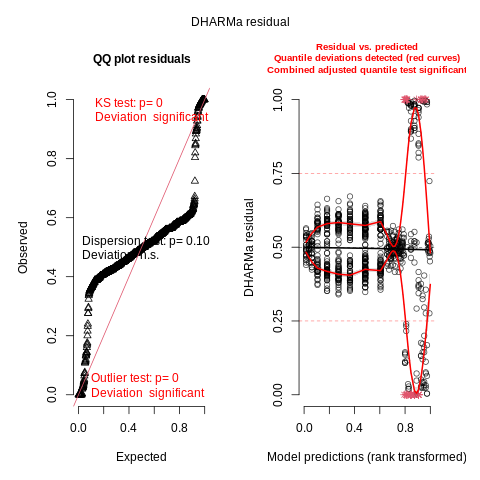

In [ ]:
%%R
simulationOutput <- simulateResiduals(fittedModel = model, plot=F)
plot(simulationOutput)

In [ ]:
1005*216000


217080000